In [1]:
def get_percentage_decrease_json(json, min_key=1024):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key > min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

def get_data(df, dataset='earnings22', split='test', return_all=False):
    seq_lens = df.loc[df['dataset'] == dataset].loc[df['split'] == split]['seq_len'].unique()
    print(seq_lens)

    out_data = {}
    for seq_len in seq_lens:
        sset = df.loc[df['dataset'] == dataset].loc[df['split'] == split].loc[df['seq_len'] == seq_len]
        if not return_all:
            out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
        else:
            out_data[seq_len] = [el*100 for el in sset['wer'].tolist()]
        if len(sset) != 3:
            print(f'Sequence length {seq_len} has {len(sset)} results')
    return out_data


In [2]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results/IS_paper


In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [4]:
dpi = 300
# default
width = 6.4
height = 4.8
tw = 8
rot = 45

In [5]:
from matplotlib.pyplot import figure

In [6]:
import matplotlib
data5 = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='rev16')
data6 = get_data(pd.read_csv('evals_rb_rev_redo.csv', sep=','), dataset='rev16')

pd5 = get_percentage_decrease_json(data5, min_key=1024)
pd6 = get_percentage_decrease_json(data6, min_key=1024)

plt.xscale('log', basex=2)

plt.plot([el/100/60 for el in sorted(list(pd5.keys()))], [pd5[el] for el in sorted(list(pd5.keys()))], label='RB 6L 256D')
plt.plot([el/100/60 for el in sorted(list(pd6.keys()))], [pd6[el] for el in sorted(list(pd6.keys()))], label='RB 6L 512D')

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(list(pd5.keys()))]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=rot)
plt.legend()

[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]


FileNotFoundError: [Errno 2] No such file or directory: 'evals_rb_rev_redo.csv'

In [ ]:
get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='earnings22_full', return_all=False)

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


{1024: {'wer': 27.732690102790432, 'std': 0.5788710570109643},
 2048: {'wer': 26.22831370743086, 'std': 0.28477233623111176},
 4096: {'wer': 25.88516049149792, 'std': 0.7104321167935399},
 8192: {'wer': 24.94340795199844, 'std': 0.013172574527403207},
 16384: {'wer': 24.582165567622884, 'std': 0.17230745382596813},
 32768: {'wer': 24.416184767838196, 'std': 0.07390798253239965},
 65536: {'wer': 24.419058747871137, 'std': 0.050110843114517314},
 131072: {'wer': 24.351570934391766, 'std': 0.5006178490997534},
 262144: {'wer': 24.35725127139805, 'std': 0.0345338723618036},
 360000: {'wer': 24.345180555259702, 'std': 0.035168168417713995}}

In [ ]:
data = get_data(pd.read_csv('evals_rb_9l_768d.csv', sep=','), dataset='earnings22_full', return_all=True)
np.array(data[131072] + data[262144] + data[360000]).mean()

[  2048   4096  16384  32768   1024   8192  65536 131072 262144 360000]


22.791236457214378

In [ ]:
x1, x2 = 24.345180555259702, 24.419058747871137
s1, s2 = 0.035168168417713995, 0.050110843114517314
n1, n2 = 9, 3
(x1 - x2) / ((s1**2)/n1 + (s2**2)/n2)**0.5

-2.3666579538378505

In [ ]:
x1, x2 = 24.351215913328872, 24.419058747871137
s1, s2 = 0.029089889716917918, 0.050110843114517314
n1, n2 = 6, 3
(x1 - x2) / ((s1**2)/n1 + (s2**2)/n2)**0.5

-2.1692979473202807

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  2048   4096  16384  32768   1024   8192  65536 131072 262144 360000]
[  2048   4096   8192  16384  32768  65536   1024 131072 262144 360000]
Sequence length 1024 has 2 results


/tmp/ipykernel_8072/2324086977.py:51: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_8072/2324086977.py:63: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


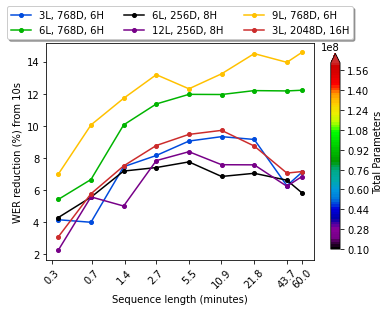

In [ ]:
import matplotlib
import matplotlib as mpl

#figure(figsize=(8, 6), dpi=dpi)

csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv3 = pd.read_csv('evals_rotary_pos_6l_256d.csv', sep=',')
csv4 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',')
csv5 = pd.read_csv('evals_rb_9l_768d.csv', sep=',')
csv6 = pd.read_csv('evals_rb_3l_2048d.csv', sep=',')


from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

params = [
    49158656, # 3l
    89914112, # rb
    11979008, # 6l 256d
    21061376, # 12l 256d
    130669568, # 9l 768d
    317374464
]
param_min, param_max = min(params), 160000000#max(params)
step = 2000000
boundaries = [param_min-step]+[d+step for d in range(param_min, param_max+1, step)]
cm = plt.get_cmap('nipy_spectral')
#cm = cm.reversed()
norm = BoundaryNorm(boundaries, 245)
colors = [cm(norm(p)) for p in params]


dataset = 'earnings22_full'
data1 = get_data(csv1, dataset=dataset)
data2 = get_data(csv2, dataset=dataset)
data3 = get_data(csv3, dataset=dataset)
data4 = get_data(csv4, dataset=dataset)
data5 = get_data(csv5, dataset=dataset)
data6 = get_data(csv6, dataset=dataset)
#data6[131072] = {'wer':26.0}
#data3[1024] = {'wer':32.3}

pdecrease1 = get_percentage_decrease_json(data1, min_key=1024)
pdecrease2 = get_percentage_decrease_json(data2, min_key=1024)
pdecrease3 = get_percentage_decrease_json(data3, min_key=1024)
pdecrease4 = get_percentage_decrease_json(data4, min_key=1024)
pdecrease5 = get_percentage_decrease_json(data5, min_key=1024)
pdecrease6 = get_percentage_decrease_json(data6, min_key=1024)

plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(list(pdecrease1.keys()))], [pdecrease1[el] for el in sorted(list(pdecrease1.keys()))], label='3L, 768D, 6H', marker='o', markersize=4, color=colors[0])
plt.plot([el/100/60 for el in sorted(list(pdecrease2.keys()))], [pdecrease2[el] for el in sorted(list(pdecrease2.keys()))], label='6L, 768D, 6H', marker='o', markersize=4, color=colors[1])   
plt.plot([el/100/60 for el in sorted(list(pdecrease3.keys()))], [pdecrease3[el] for el in sorted(list(pdecrease3.keys()))], '-', label='6L, 256D, 8H', marker='o', markersize=4, color=colors[2])
plt.plot([el/100/60 for el in sorted(list(pdecrease4.keys()))], [pdecrease4[el] for el in sorted(list(pdecrease4.keys()))], label='12L, 256D, 8H', marker='o', markersize=4, color=colors[3])
plt.plot([el/100/60 for el in sorted(list(pdecrease5.keys()))], [pdecrease5[el] for el in sorted(list(pdecrease5.keys()))], label='9L, 768D, 6H', marker='o', markersize=4, color=colors[4])
plt.plot([el/100/60 for el in sorted(list(pdecrease6.keys()))], [pdecrease6[el] for el in sorted(list(pdecrease6.keys()))], label='3L, 2048D, 16H', marker='o', markersize=4, color=colors[5])

cb = plt.colorbar(ScalarMappable(norm, cm),shrink=0.9, extend='max')
cb.set_label('Total Parameters')

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(list(pdecrease1.keys()))]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=rot)

plt.rc('xtick', labelsize=tw)
plt.rc('ytick', labelsize=tw)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.19), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes.pdf', bbox_inches='tight')
plt.show()


[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]
[  2048   4096  16384  32768  65536 131072 262144 360000   1024   8192]
[  2048   4096  16384  32768  65536 131072 360000   1024   8192 262144]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[]


/tmp/ipykernel_8072/3578265408.py:51: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_8072/3578265408.py:63: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


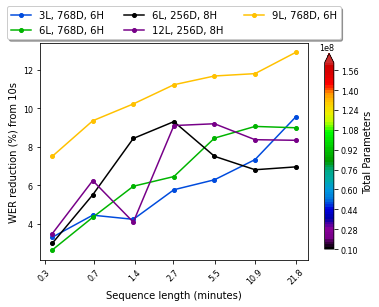

In [12]:
import matplotlib
import matplotlib as mpl

#figure(figsize=(8, 6), dpi=dpi)

csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv3 = pd.read_csv('evals_rotary_pos_6l_256d.csv', sep=',')
csv4 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',')
csv5 = pd.read_csv('evals_rb_9l_768d.csv', sep=',')
csv6 = pd.read_csv('evals_rb_3l_2048d.csv', sep=',')


from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

params = [
    49158656, # 3l
    89914112, # rb
    11979008, # 6l 256d
    21061376, # 12l 256d
    130669568, # 9l 768d
    317374464
]
param_min, param_max = min(params), 160000000#max(params)
step = 2000000
boundaries = [param_min-step]+[d+step for d in range(param_min, param_max+1, step)]
cm = plt.get_cmap('nipy_spectral')
#cm = cm.reversed()
norm = BoundaryNorm(boundaries, 245)
colors = [cm(norm(p)) for p in params]


dataset = 'tedlium'
data1 = get_data(csv1, dataset=dataset)
data2 = get_data(csv2, dataset=dataset)
data3 = get_data(csv3, dataset=dataset)
data4 = get_data(csv4, dataset=dataset)
data5 = get_data(csv5, dataset=dataset)
data6 = get_data(csv6, dataset=dataset)
#data6[131072] = {'wer':26.0}
#data3[1024] = {'wer':32.3}

pdecrease1 = get_percentage_decrease_json(data1, min_key=1024)
pdecrease2 = get_percentage_decrease_json(data2, min_key=1024)
pdecrease3 = get_percentage_decrease_json(data3, min_key=1024)
pdecrease4 = get_percentage_decrease_json(data4, min_key=1024)
pdecrease5 = get_percentage_decrease_json(data5, min_key=1024)
# pdecrease6 = get_percentage_decrease_json(data6, min_key=1024)

plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(list(pdecrease1.keys())) if el <= 131072], [pdecrease1[el] for el in sorted(list(pdecrease1.keys())) if el <= 131072], label='3L, 768D, 6H', marker='o', markersize=4, color=colors[0])
plt.plot([el/100/60 for el in sorted(list(pdecrease2.keys())) if el <= 131072], [pdecrease2[el] for el in sorted(list(pdecrease2.keys())) if el <= 131072], label='6L, 768D, 6H', marker='o', markersize=4, color=colors[1])   
plt.plot([el/100/60 for el in sorted(list(pdecrease3.keys())) if el <= 131072], [pdecrease3[el] for el in sorted(list(pdecrease3.keys())) if el <= 131072], '-', label='6L, 256D, 8H', marker='o', markersize=4, color=colors[2])
plt.plot([el/100/60 for el in sorted(list(pdecrease4.keys())) if el <= 131072], [pdecrease4[el] for el in sorted(list(pdecrease4.keys())) if el <= 131072], label='12L, 256D, 8H', marker='o', markersize=4, color=colors[3])
plt.plot([el/100/60 for el in sorted(list(pdecrease5.keys())) if el <= 131072], [pdecrease5[el] for el in sorted(list(pdecrease5.keys())) if el <= 131072], label='9L, 768D, 6H', marker='o', markersize=4, color=colors[4])
# plt.plot([el/100/60 for el in sorted(list(pdecrease6.keys()))], [pdecrease6[el] for el in sorted(list(pdecrease6.keys()))], label='3L, 2048D, 16H', marker='o', markersize=4, color=colors[5])

cb = plt.colorbar(ScalarMappable(norm, cm),shrink=0.9, extend='max')
cb.set_label('Total Parameters')

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(list(pdecrease1.keys())) if el <= 131072]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=rot)

plt.rc('xtick', labelsize=tw)
plt.rc('ytick', labelsize=tw)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.19), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes_tedlium.pdf', bbox_inches='tight')
plt.show()


[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]
[  2048   4096  16384  32768  65536 131072 262144 360000   1024   8192]
[  2048   4096  16384  32768  65536 131072 360000   1024   8192 262144]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[]


/tmp/ipykernel_8072/2418272559.py:51: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_8072/2418272559.py:63: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


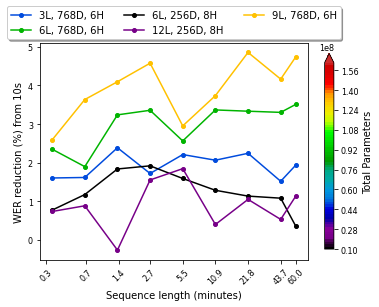

In [13]:
import matplotlib
import matplotlib as mpl

#figure(figsize=(8, 6), dpi=dpi)

csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv3 = pd.read_csv('evals_rotary_pos_6l_256d.csv', sep=',')
csv4 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',')
csv5 = pd.read_csv('evals_rb_9l_768d.csv', sep=',')
csv6 = pd.read_csv('evals_rb_3l_2048d.csv', sep=',')


from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

params = [
    49158656, # 3l
    89914112, # rb
    11979008, # 6l 256d
    21061376, # 12l 256d
    130669568, # 9l 768d
    317374464
]
param_min, param_max = min(params), 160000000#max(params)
step = 2000000
boundaries = [param_min-step]+[d+step for d in range(param_min, param_max+1, step)]
cm = plt.get_cmap('nipy_spectral')
#cm = cm.reversed()
norm = BoundaryNorm(boundaries, 245)
colors = [cm(norm(p)) for p in params]


dataset = 'rev16'
data1 = get_data(csv1, dataset=dataset)
data2 = get_data(csv2, dataset=dataset)
data3 = get_data(csv3, dataset=dataset)
data4 = get_data(csv4, dataset=dataset)
data5 = get_data(csv5, dataset=dataset)
data6 = get_data(csv6, dataset=dataset)
#data6[131072] = {'wer':26.0}
#data3[1024] = {'wer':32.3}

pdecrease1 = get_percentage_decrease_json(data1, min_key=1024)
pdecrease2 = get_percentage_decrease_json(data2, min_key=1024)
pdecrease3 = get_percentage_decrease_json(data3, min_key=1024)
pdecrease4 = get_percentage_decrease_json(data4, min_key=1024)
pdecrease5 = get_percentage_decrease_json(data5, min_key=1024)
#pdecrease6 = get_percentage_decrease_json(data6, min_key=1024)

plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(list(pdecrease1.keys()))], [pdecrease1[el] for el in sorted(list(pdecrease1.keys()))], label='3L, 768D, 6H', marker='o', markersize=4, color=colors[0])
plt.plot([el/100/60 for el in sorted(list(pdecrease2.keys()))], [pdecrease2[el] for el in sorted(list(pdecrease2.keys()))], label='6L, 768D, 6H', marker='o', markersize=4, color=colors[1])   
plt.plot([el/100/60 for el in sorted(list(pdecrease3.keys()))], [pdecrease3[el] for el in sorted(list(pdecrease3.keys()))], '-', label='6L, 256D, 8H', marker='o', markersize=4, color=colors[2])
plt.plot([el/100/60 for el in sorted(list(pdecrease4.keys()))], [pdecrease4[el] for el in sorted(list(pdecrease4.keys()))], label='12L, 256D, 8H', marker='o', markersize=4, color=colors[3])
plt.plot([el/100/60 for el in sorted(list(pdecrease5.keys()))], [pdecrease5[el] for el in sorted(list(pdecrease5.keys()))], label='9L, 768D, 6H', marker='o', markersize=4, color=colors[4])
#plt.plot([el/100/60 for el in sorted(list(pdecrease6.keys()))], [pdecrease6[el] for el in sorted(list(pdecrease6.keys()))], label='3L, 2048D, 16H', marker='o', markersize=4, color=colors[5])

cb = plt.colorbar(ScalarMappable(norm, cm),shrink=0.9, extend='max')
cb.set_label('Total Parameters')

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(list(pdecrease1.keys()))]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=rot)

plt.rc('xtick', labelsize=tw)
plt.rc('ytick', labelsize=tw)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.19), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes_rev16.pdf', bbox_inches='tight')
plt.show()


[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]
[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]


/tmp/ipykernel_8072/3954995416.py:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_8072/3954995416.py:14: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


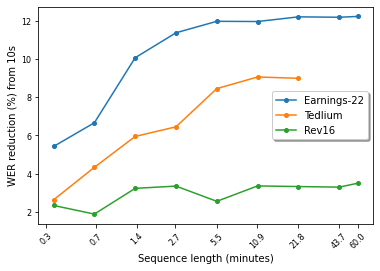

In [14]:
import matplotlib

#figure(figsize=(8, 6), dpi=dpi)
earnings_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='earnings22_full')
tedlium_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='tedlium')
rev16 = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='rev16')

plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(get_percentage_decrease_json(earnings_test).keys())], [get_percentage_decrease_json(earnings_test)[key] for key in sorted(get_percentage_decrease_json(earnings_test).keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(get_percentage_decrease_json(tedlium_test).keys()) if el<=131072], [get_percentage_decrease_json(tedlium_test)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys()) if key<=131072], label='Tedlium', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(get_percentage_decrease_json(rev16).keys())], [get_percentage_decrease_json(rev16)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Rev16', marker='o', markersize=4)

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(get_percentage_decrease_json(earnings_test).keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=rot)

plt.rc('xtick', labelsize=tw)
plt.rc('ytick', labelsize=tw)

plt.legend(fancybox=True, shadow=True)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('werr_rb_across_datasets.pdf', bbox_inches='tight') 
plt.show()

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_8072/2948958787.py:9: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_8072/2948958787.py:18: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


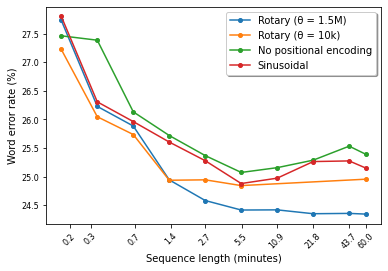

In [15]:
import matplotlib
#figure(figsize=(8, 6), dpi=dpi)

rotary_pos = get_data(pd.read_csv('evals_rb.csv', sep=','), split='test', dataset="earnings22_full")
rotary_base_pos = get_data(pd.read_csv('evals_rotary_10k.csv', sep=','), split='test', dataset="earnings22_full")
no_rotary = get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='test', dataset="earnings22_full")
sinousoidal_pos = get_data(pd.read_csv('evals_fourier_pos.csv', sep=','), split='test', dataset="earnings22_full")

plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(rotary_pos.keys())], [rotary_pos[k]['wer'] for k in sorted(rotary_pos.keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(rotary_base_pos.keys())], [rotary_base_pos[k]['wer'] for k in sorted(rotary_base_pos.keys())], label='Rotary (θ = 10k)', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(no_rotary.keys())], [no_rotary[k]['wer'] for k in sorted(no_rotary.keys())], label='No positional encoding', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(sinousoidal_pos.keys())], [sinousoidal_pos[k]['wer'] for k in sorted(sinousoidal_pos.keys())], label='Sinusoidal', marker='o', markersize=4)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('Word error rate (%)')

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(rotary_pos.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.rc('ytick', labelsize=tw)
plt.xticks(rotation=rot)


plt.legend(fancybox=True, shadow=True)
plt.savefig('wer_pos_earnings.pdf', bbox_inches='tight')
plt.show()

In [16]:
get_data(csv5, dataset='rev16_background_noise', return_all=True)

[]


{}

[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_8072/4166964393.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_8072/4166964393.py:64: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


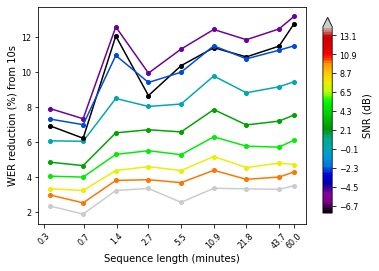

In [17]:
import matplotlib
from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import math
#figure(figsize=(8, 6), dpi=dpi)
csv1 = pd.read_csv('evals_rb.csv', sep=','  )
csv2 = pd.read_csv('evals_rb_rev16_bnoise.csv', sep=','  )
csv3 = pd.read_csv('evals_rb_rev16_bnoise_m5_SNR.csv', sep=','  )
csv4 = pd.read_csv('evals_rb_rev16_bnoise_5_SNR.csv', sep=','  )
csv5 = pd.read_csv('evals_rb_rev16_bnoise_m7p5_SNR.csv', sep=',')
csv6 = pd.read_csv('evals_rb_rev16_bnoise_10_SNR.csv', sep=',')
csv7 = pd.read_csv('evals_rb_rev16_bnoise_2p5_SNR.csv', sep=',')
csv8 = pd.read_csv('evals_rb_rev16_bnoise_m2p5_SNR.csv', sep=',')
csv9 = pd.read_csv('evals_rb_rev16_bnoise_7p5_SNR.csv', sep=',')
#csv10 = pd.read_csv("evals_rb_rev16_80s_m5snr.csv")


data1 = get_data(csv1, dataset='rev16')
data2 = get_data(csv2, dataset='rev16_background_noise')
data3 = get_data(csv3, dataset='rev16_background_noise')
data4 = get_data(csv4, dataset='rev16_background_noise')
data5 = get_data(csv5, dataset='rev16_background_noise')
data6 = get_data(csv6, dataset='rev16_background_noise')
data7 = get_data(csv7, dataset='rev16_background_noise')
data8 = get_data(csv8, dataset='rev16_background_noise')
data9 = get_data(csv9, dataset='rev16_background_noise')

minkey = 1024
pdecrease1 = get_percentage_decrease_json(data1, min_key=minkey)
pdecrease2 = get_percentage_decrease_json(data2, min_key=minkey)
pdecrease3 = get_percentage_decrease_json(data3, min_key=minkey)
pdecrease4 = get_percentage_decrease_json(data4, min_key=minkey)
pdecrease5 = get_percentage_decrease_json(data5, min_key=minkey)
pdecrease6 = get_percentage_decrease_json(data6, min_key=minkey)
pdecrease7 = get_percentage_decrease_json(data7, min_key=minkey)
pdecrease8 = get_percentage_decrease_json(data8, min_key=minkey)
pdecrease9 = get_percentage_decrease_json(data9, min_key=minkey)


snrs = [99999999999, 0, -5, 5, -7.5, 10, 2.5, -2.5, 7.5, -5]
step = 2
snrs = [int(el*10) for el in snrs]
param_min, param_max = min(snrs), 140
boundaries = [param_min-step]+[d+step for d in range(param_min, param_max+1, step)]
boundaries = [el/10 for el in boundaries]
snrs = [el/10 for el in snrs]
cm = plt.get_cmap('nipy_spectral')
#cm = cm.reversed()
norm = BoundaryNorm(boundaries, 256)
colors = [cm(norm(p)) for p in snrs]

plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(list(pdecrease1.keys()))], [pdecrease1[el] for el in sorted(list(pdecrease1.keys()))], label='No background noise', marker='o', markersize=4, color=colors[0])
plt.plot([el/100/60 for el in sorted(list(pdecrease2.keys()))], [pdecrease2[el] for el in sorted(list(pdecrease2.keys()))], label='Background noise', marker='o', markersize=4, color=colors[1])
plt.plot([el/100/60 for el in sorted(list(pdecrease3.keys()))], [pdecrease3[el] for el in sorted(list(pdecrease3.keys()))], label='Background noise, -5 SNR', marker='o', markersize=4, color=colors[2])
plt.plot([el/100/60 for el in sorted(list(pdecrease4.keys()))], [pdecrease4[el] for el in sorted(list(pdecrease4.keys()))], label='Background noise, 5 SNR', marker='o', markersize=4, color=colors[3])
plt.plot([el/100/60 for el in sorted(list(pdecrease5.keys()))], [pdecrease5[el] for el in sorted(list(pdecrease5.keys()))], label='Background noise, -7.5 SNR', marker='o', markersize=4, color=colors[4])
plt.plot([el/100/60 for el in sorted(list(pdecrease6.keys()))], [pdecrease6[el] for el in sorted(list(pdecrease6.keys()))], label='Background noise, 10 SNR', marker='o', markersize=4, color=colors[5])
plt.plot([el/100/60 for el in sorted(list(pdecrease7.keys()))], [pdecrease7[el] for el in sorted(list(pdecrease7.keys()))], label='Background noise, 2.5 SNR', marker='o', markersize=4, color=colors[6])
plt.plot([el/100/60 for el in sorted(list(pdecrease8.keys()))], [pdecrease8[el] for el in sorted(list(pdecrease8.keys()))], label='Background noise, -2.5 SNR', marker='o', markersize=4, color=colors[7])
plt.plot([el/100/60 for el in sorted(list(pdecrease9.keys()))], [pdecrease9[el] for el in sorted(list(pdecrease9.keys()))], label='Background noise, 7.5 SNR', marker='o', markersize=4, color=colors[8])

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(pdecrease1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=rot)

plt.rc('xtick', labelsize=tw)
plt.rc('ytick', labelsize=tw)

cb = plt.colorbar(ScalarMappable(norm, cm),shrink=0.9, extend='max')
cb.set_label('SNR (dB)')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('werr_rev16_bnoise.pdf', bbox_inches='tight')
plt.show()

In [18]:
get_data(csv1, dataset=dataset, split='test', return_all=False)

[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]


{4096: {'wer': 14.684979495706834, 'std': 0.0647991434968929},
 8192: {'wer': 14.483980219619832, 'std': 0.06036572632965554},
 16384: {'wer': 14.466227584832932, 'std': 0.017557599458346475},
 32768: {'wer': 14.585170237905032, 'std': 0.12590657501034686},
 65536: {'wer': 14.4648468243495, 'std': 0.057336094130601326},
 360000: {'wer': 14.443543662605265, 'std': 0.034550557910886445},
 2048: {'wer': 14.617322232019033, 'std': 0.10282972382923761},
 131072: {'wer': 14.469778111790333, 'std': 0.18969616123133112},
 1024: {'wer': 14.968627149301634, 'std': 0.10195422174828854},
 262144: {'wer': 14.474314896235866, 'std': 0.059579422216614115}}

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024  32768  65536 131072 262144 360000   2048   4096   8192  16384]
[  1024  32768  65536 131072 262144 360000   2048   4096   8192  16384]
[  2048   4096   8192  16384  32768 131072 262144 360000]
Sequence length 2048 has 2 results
Sequence length 4096 has 1 results
Sequence length 8192 has 1 results
Sequence length 16384 has 1 results
Sequence length 32768 has 2 results
Sequence length 131072 has 2 results
Sequence length 262144 has 2 results


/tmp/ipykernel_8072/887580595.py:27: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


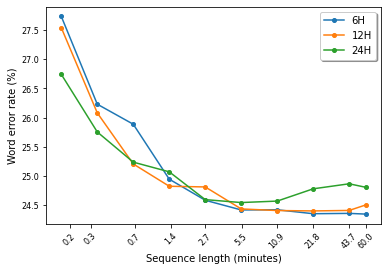

In [19]:
import matplotlib.ticker as mticker
import matplotlib

#figure(figsize=(8, 6), dpi=dpi)

dataset = 'earnings22_full'

csv1 = pd.read_csv('evals_rb.csv', sep=','  )
data1 = get_data(csv1, dataset=dataset, split='test')

csv2 = pd.read_csv('evals_rb_12h.csv', sep=',')
data2 = get_data(csv2, dataset=dataset, split='test')

csv3 = pd.read_csv('evals_rb_24h.csv', sep=',')
data3 = get_data(csv3, dataset=dataset, split='test')

csv4 = pd.read_csv('evals_rotary_3h.csv', sep=',')
data4 = get_data(csv4, dataset=dataset, split='test')


plt.plot([el/100/60 for el in sorted(data1.keys())], [data1[key]['wer'] for key in sorted(data1.keys())], label='6H', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(data2.keys())], [data2[key]['wer'] for key in sorted(data2.keys())], label='12H', marker='o', markersize=4)
plt.plot([el/100/60 for el in sorted(data3.keys())], [data3[key]['wer'] for key in sorted(data3.keys())], label='24H', marker='o', markersize=4)
#plt.plot([el/100/60 for el in sorted(data4.keys())], [data4[key]['wer'] for key in sorted(data4.keys())], label='3H', marker='o', markersize=4)

ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)

plt.rc('ytick', labelsize=tw)

plt.legend(fancybox=True, shadow=True)
plt.xlabel('Sequence length (minutes)')
plt.ylabel('Word error rate (%)')
plt.savefig('wer_head_size_earnings.pdf', bbox_inches='tight')


# plt.plot([el/100 for el in sorted(data2.keys())], [data2[key]['wer'] for key in sorted(data2.keys())], label='Frequency + Time Masking', marker='o', markersize=4)


In [20]:
data

{2048: [24.829158792806698, 25.0003803797102, 24.4031335173357],
 4096: [23.7341724002568, 24.2159866998966, 23.8401715461776],
 16384: [23.2292310142343, 23.0888455425077, 22.9773689287594],
 32768: [23.052937697860802, 23.5592991681349, 23.3838173284766],
 1024: [27.189034515147696, 24.6070170420254, 28.02079814821013],
 8192: [23.8071038700339, 23.460400443472, 23.2008293292029],
 65536: [23.349735306439, 23.1536622451329, 22.7486339296673],
 131072: [22.5855271099155, 22.7101902202855, 22.9528217581252],
 262144: [22.974833064024498, 22.9975544120496, 22.709277308980898],
 360000: [22.841852317323898, 22.72834701178771, 22.62072491243659]}

In [9]:
!ls evals_rotary_windowed

ls: cannot access 'evals_rotary_windowed': No such file or directory


In [16]:
data

{32: {'wer': 15.876792981775282, 'std': 0.0, 'all_wer': [0.1587679298177528]},
 64: {'wer': 15.747601272512801, 'std': 0.0, 'all_wer': [0.157476012725128]},
 128: {'wer': 15.709303334984401, 'std': 0.0, 'all_wer': [0.157093033349844]},
 256: {'wer': 15.51577109067419, 'std': 0.0, 'all_wer': [0.1551577109067419]},
 512: {'wer': 15.52138812151169, 'std': 0.0, 'all_wer': [0.1552138812151169]},
 1024: {'wer': 15.47951570981397, 'std': 0.0, 'all_wer': [0.1547951570981397]},
 2048: {'wer': 15.434579463113979,
  'std': 0.0,
  'all_wer': [0.1543457946311398]},
 4096: {'wer': 15.366664453896938,
  'std': 0.0,
  'all_wer': [0.1536666445389694]},
 8192: {'wer': 15.42283476227193, 'std': 0.0, 'all_wer': [0.1542283476227193]},
 16384: {'wer': 15.392707051416249,
  'std': 0.0,
  'all_wer': [0.1539270705141625]},
 32768: {'wer': 15.380451711407158,
  'std': 0.0,
  'all_wer': [0.1538045171140716]},
 360000: {'wer': 15.39730280391966,
  'std': 0.0,
  'all_wer': [0.1539730280391966]}}

/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robertflynn/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


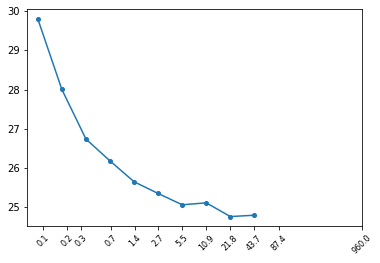

In [27]:
csv1 = pd.read_csv('../evals_rotary_windowed.csv')
window_sizes = sorted(list(set([int(el.split("/")[-2].split("_")[-3]) for el in list(csv1.checkpoint) if isinstance(el, str)])))
window_sizes_seconds = [(el * 8 * 2)/100/60 for el in window_sizes]

data = {el:[] for el in window_sizes}

dataset = 'earnings22_full'
split = 'test'

for window_size in window_sizes:
    sset = csv1.loc[csv1['dataset'] == dataset].loc[csv1['split'] == split]
    sset = sset.loc[sset['checkpoint'].str.contains(str(window_size)+'_')]
    for index, row in sset.iterrows():
        data[window_size].append(row['wer'])

for key in data:
    data[key] = {'wer':np.mean(data[key]) * 100, 'std':np.std(data[key]) * 100, 'all_wer':data[key]}

pdeacrease1 = get_percentage_decrease_json(data, min_key=32)

#plt.plot([(el*8*2)/100/60 for el in pdeacrease1], [pdeacrease1[el] for el in pdeacrease1], marker='o', markersize=4)
plt.plot(window_sizes_seconds, [data[key]['wer'] for key in window_sizes], label='Rotary window size', marker='o', markersize=4)

ax=plt.gca()
ax.set_xscale('log', base=2)
ax.set_xticks([round(el, 1) for el in window_sizes_seconds])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)

plt.show()

In [26]:
[(el * 8 * 2)/100 for el in window_sizes]

[5.12,
 10.24,
 20.48,
 40.96,
 81.92,
 163.84,
 327.68,
 655.36,
 1310.72,
 2621.44,
 5242.88,
 57600.0]

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_6926/1258817573.py:3: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_6926/1258817573.py:6: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


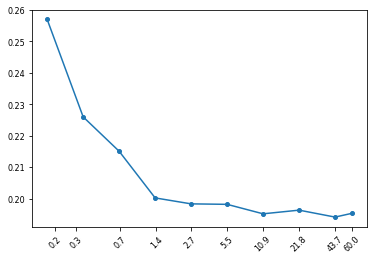

In [168]:
import matplotlib
datas = get_data(pd.read_csv("evals_rb_rev16_self_loss.csv"), dataset='rev16_loss')
plt.xscale('log', basex=2)
plt.plot([el/100/60 for el in sorted(datas.keys())], [datas[key]['wer']/100 for key in sorted(datas.keys())], label='Self-supervised loss', marker='o', markersize=4)
ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.show()

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_6926/812281739.py:3: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_6926/812281739.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


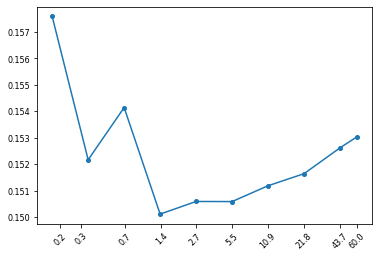

{1024: {'wer': 15.758776169506586, 'std': 0.22982201943108552}, 2048: {'wer': 15.216906011957784, 'std': 0.005193934952473794}, 4096: {'wer': 15.414236885499655, 'std': 0.28433406152007845}, 8192: {'wer': 15.011572392210374, 'std': 0.05554265674154596}, 16384: {'wer': 15.059272971567083, 'std': 0.016099431892305217}, 32768: {'wer': 15.058851774398372, 'std': 0.018387318862082717}, 65536: {'wer': 15.11876707164774, 'std': 0.15918285935100387}, 131072: {'wer': 15.164361665160882, 'std': 0.05089388326472952}, 262144: {'wer': 15.26218470759439, 'std': 0.03633008704734833}, 360000: {'wer': 15.302619635790805, 'std': 0.07162341438622809}}
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_6926/812281739.py:15: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)
/tmp/ipykernel_6926/812281739.py:17: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=2)


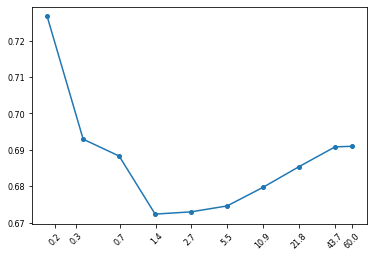

In [173]:
data = get_data(pd.read_csv("spotify_rb_8.csv"), dataset='spotify')
#pdecrease = get_percentage_decrease_json(data, min_key=1024)
plt.xscale('log', basex=2)
ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())]) 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.plot([el/100/60 for el in sorted(list(data.keys()))], [data[el]['wer']/100 for el in sorted(list(data.keys()))], label='Spotify', marker='o', markersize=4)
plt.show()
print(data)
data = get_data(pd.read_csv("spotify_rb_8_loss.csv"), dataset='spotify_loss')

plt.xscale('log', basex=2)
ax=plt.gca()
ax.set_xscale('log', basex=2)
ax.set_xticks([round(el/100/60, 1) for el in sorted(data1.keys())])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.rc('xtick', labelsize=tw)
plt.xticks(rotation=rot)
plt.plot([el/100/60 for el in sorted(list(data.keys()))], [data[el]['wer']/100 for el in sorted(list(data.keys()))], label='Spotify, self-supervised loss', marker='o', markersize=4)
plt.show()

In [22]:
import json 

test_path = "/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/this_american_life/test-transcripts-aligned.json"

with open(test_path) as f:
    test = json.load(f)


In [ ]:
[el.split('-')[-1] for el in list(test.keys())]

In [40]:
print(" ".join([el['utterance'] for el in test['ep-11']]))

"I'll pour this pestilence into his ear. So will I make the net that will enmesh them all." It's an adult, Iago, who says that in Othello. And it's grownups that Machiavelli was writing about when he wrote The Prince, his book about manipulating others and seizing power. Notice he titled the book The Prince, not The Little Prince. The Little Prince is actually by somebody else, if you don't know that. But in our American lives, the real era of intrigue and manipulation for most of us is not adulthood. It's adolescence, when our social circle is at its most constricting. Today on our program, a story of betrayal and of someone who holds David Koresh-like powers over others, and who is only in the seventh grade. From WBEZ in Chicago, it's Your Radio Playhouse. I'm Ira Glass. But before we get into the body of our story, we will try, as adults, to manipulate you a little bit at Pledge Central. Let's check in with Pledge Central. Shirley Jahad. Hi, Ira Glass. Hi. We're trying to manipulate

In [35]:
# uninstall whisper (auto proceed for y/n)
!pip uninstall whisper -y

Found existing installation: whisper 1.1.10
Uninstalling whisper-1.1.10:
  Successfully uninstalled whisper-1.1.10


In [144]:
	
## load the data
import json
import os

with open('/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/spotify/audio_txt_pairs.json') as f:
    pairs = json.load(f)

In [ ]:
max_speakers = 0
for key in data:
    #print(key)
    #print(data[key]['txt'])
    txt_path = "/home/robertflynn/Stanage/" + data[key]['txt']
    with open(txt_path, 'r') as f:
        txt = json.load(f)
        #print(txt)
    speakers = len(set([el['speakerTag'] for  el in txt['results'][-1]['alternatives'][0]['words']]))
    max_speakers = max(max_speakers, speakers)
    if speakers == max_speakers: print(max_speakers)

In [161]:
[el for el in list(pairs.keys()) if '4_Q_show_4qoT9Y8CYoXVIuX3yqabhp_2fdlxZXyAJtydiu9ds2yBK' in el]

['4_Q_show_4qoT9Y8CYoXVIuX3yqabhp_2fdlxZXyAJtydiu9ds2yBK']

In [162]:
pairs['4_Q_show_4qoT9Y8CYoXVIuX3yqabhp_2fdlxZXyAJtydiu9ds2yBK']

{'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/Q/show_4qoT9Y8CYoXVIuX3yqabhp/2fdlxZXyAJtydiu9ds2yBK.spec.pt',
 'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/Q/show_4qoT9Y8CYoXVIuX3yqabhp/2fdlxZXyAJtydiu9ds2yBK.json',
 'duration': 1415.999274}

In [164]:
with open('/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/Q/show_4qoT9Y8CYoXVIuX3yqabhp/2fdlxZXyAJtydiu9ds2yBK.json') as f:
    data = json.load(f)

In [154]:
file = "/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/X/show_4XBdOYESNmUCKdCKPDb1oc/0Fry44MaAhxuSBqAWqb83M.json"

import json
with open(file, 'r') as f:
    data = json.load(f)
    print(data)

{'results': [{'alternatives': [{'transcript': "Sticking to show-and-tell happy that it's right. I wanted to quickly just go through both your show-and-tell items to okay, so you can start I'll go first this strip told me to like yeah, it's fine. So this trip here is a 2005 Bolton Wanderers kit.", 'confidence': 0.7626030445098877, 'words': [{'startTime': '15.300s', 'endTime': '15.700s', 'word': 'Sticking'}, {'startTime': '15.700s', 'endTime': '15.800s', 'word': 'to'}, {'startTime': '15.800s', 'endTime': '16.500s', 'word': 'show-and-tell'}, {'startTime': '16.500s', 'endTime': '16.700s', 'word': 'happy'}, {'startTime': '16.700s', 'endTime': '17s', 'word': 'that'}, {'startTime': '17s', 'endTime': '17.200s', 'word': "it's"}, {'startTime': '17.200s', 'endTime': '17.500s', 'word': 'right.'}, {'startTime': '17.500s', 'endTime': '17.500s', 'word': 'I'}, {'startTime': '17.500s', 'endTime': '17.700s', 'word': 'wanted'}, {'startTime': '17.700s', 'endTime': '17.800s', 'word': 'to'}, {'startTime': '

In [169]:
from typing import List, Dict
HOP_LENGTH = 160
SR = 16000

def total_seconds(spectogram_length:int) -> float:
    '''converts number of frames to seconds'''
    return (spectogram_length * HOP_LENGTH) / SR

def total_frames(seconds:float) -> int:
    '''inverse of total_seconds'''
    return int((seconds * 16000) / HOP_LENGTH) 

def chunk_text_json_with_speaker_change( # TODO: speed up
        text: List[Dict[str, str]],
        chunk_size: int,
        chunk_overlap: int,
        spectogram_length: int,
        get_seconds: bool = False,
        speaker_change_token: str = "¬"
    ):
    assert chunk_size > chunk_overlap, "chunk_size must be greater than chunk_overlap"
    
    text_remaining = text
    splits = []
    start_end_times = []
    for i in range(0, spectogram_length, chunk_size - chunk_overlap):
        c_start_pos, c_end_pos = i, i + chunk_size
        c_start_pos_sec, c_end_pos_sec = total_seconds(c_start_pos), total_seconds(c_end_pos)
        chunk_overlap_sec = total_seconds(chunk_overlap)
        c_text = []
        max_text_index = 0
        prev_speaker = None
        for i, el in enumerate(text_remaining):
            if float(el['startTime'][:-1]) >= c_start_pos_sec and float(el['endTime'][:-1]) <= c_end_pos_sec:
                prev_speaker = el['speakerTag'] if prev_speaker is None else prev_speaker
                if el['speakerTag'] != prev_speaker:
                    c_text.append(speaker_change_token)
                c_text.append(el['word'])
            if float(el['endTime'][:-1]) < c_end_pos_sec - chunk_overlap_sec:
                max_text_index = i
            if float(el['endTime'][:-1]) > c_end_pos_sec:
                break
            prev_speaker = el['speakerTag']
        text_remaining = text_remaining[max_text_index:]
        splits.append(" ".join(c_text))
        start_end_times.append((c_start_pos_sec, c_end_pos_sec))
    
    return splits if not get_seconds else (splits, start_end_times)

In [170]:
out = chunk_text_json_with_speaker_change(data['results'][-1]['alternatives'][0]['words'], chunk_size=8192, spectogram_length=total_frames(60*60), chunk_overlap=0)

In [171]:
out[1]

"because I love love love just bringing you guys content especially audio content where I can just kind to relax for a second and talk with you guys about just what's going on in the resale world and really just anything, you know, we can talk about the reseller team we can talk about strategies. I really just want to talk about anything that can help you guys and you know pump out a bunch of different episodes that just have a whatever you get out of ¬ them. You get out of them if you listen to you you don't you don't take ¬ what you want. So today was a good day. I don't know. Talked about it. I'll start with this yesterday. I was getting all set up for a real estate. I think I told you guys but I put it in my Instagram stories today or yeah, I was today but there was my first tax deed auction sale for Real Estate. I'm trying to invest in my first property is like my first real estate flip and just a get back to like reselling I ¬ was walking into the ¬ courthouse and I got an alert 

In [91]:
" ".join([el['word'] for el in data['results'][-1]['alternatives'][0]['words']])

"Differences on display a recap an analysis of the latest debate among Democratic presidential hopefuls, including why Planned Parenthood is not happy Rising tension China appears set to intervene in the turmoil in Hong Kong hear from a Catholic Student in the former British territory and potting and prayers and Anglican cathedral in England makes an unusual addition why some Catholics believe it's a bad decision on EWTN news nightly for Wednesday, July 31st. 1st 2019 good evening from Washington DC and thanks for joining us for news from a Catholic perspective. I'm Jason Calvi Democrats debate why they deserve the White House in 2020 some Democrats last night attack tacky proposal of leading liberals and tonight a second wave of Democrats debate in Detroit White House. Correspondent Mark irons tells us more Mark Jason the president saw last night's debate and he'll keep an eye on what happens tonight. But he predicts the country will head into an economic sinkhole. If any of his oppon

In [95]:
def sec_to_float(sec):
    return float(sec.replace('s', ''))

speaker_timings = []
for el in data['results'][-1]['alternatives'][0]['words']:
    #print(el)
    if len(speaker_timings) == 0:
        speaker_timings.append({'speaker':el['speakerTag'], 'start':sec_to_float(el['startTime']), 'end':sec_to_float(el['endTime'])})
    elif speaker_timings[-1]['speaker'] != el['speakerTag']:
        speaker_timings.append({'speaker':el['speakerTag'], 'start':sec_to_float(el['startTime']), 'end':sec_to_float(el['endTime'])})
    else:
        prev_end_time = speaker_timings[-1]['end']
        cur_end_time = sec_to_float(el['endTime'])
        if abs(prev_end_time - cur_end_time) > 5.0:
            speaker_timings.append({'speaker':el['speakerTag'], 'start':sec_to_float(el['startTime']), 'end':sec_to_float(el['endTime'])})
        else:
            speaker_timings[-1]['end'] = sec_to_float(el['endTime'])

In [97]:
data['results'][-1]['alternatives'][0]['words'][75]

{'startTime': '30.800s', 'endTime': '32s', 'word': '2019', 'speakerTag': 2}

In [98]:
speaker_timings

[{'speaker': 2, 'start': 0.7, 'end': 32.0},
 {'speaker': 2, 'start': 42.3, 'end': 62.5},
 {'speaker': 1, 'start': 63.2, 'end': 115.5},
 {'speaker': 2, 'start': 115.6, 'end': 119.7},
 {'speaker': 1, 'start': 119.8, 'end': 137.3},
 {'speaker': 2, 'start': 137.4, 'end': 140.6},
 {'speaker': 1, 'start': 140.6, 'end': 149.0},
 {'speaker': 2, 'start': 149.0, 'end': 152.9},
 {'speaker': 1, 'start': 152.9, 'end': 163.3},
 {'speaker': 2, 'start': 163.3, 'end': 166.8},
 {'speaker': 1, 'start': 166.8, 'end': 208.5},
 {'speaker': 2, 'start': 208.9, 'end': 229.4},
 {'speaker': 1, 'start': 229.4, 'end': 230.7},
 {'speaker': 2, 'start': 230.7, 'end': 267.6},
 {'speaker': 1, 'start': 267.6, 'end': 269.0},
 {'speaker': 2, 'start': 269.0, 'end': 455.8},
 {'speaker': 1, 'start': 456.4, 'end': 478.3},
 {'speaker': 2, 'start': 478.3, 'end': 742.7},
 {'speaker': 1, 'start': 742.7, 'end': 743.4},
 {'speaker': 2, 'start': 751.5, 'end': 793.0},
 {'speaker': 1, 'start': 793.0, 'end': 841.2},
 {'speaker': 2, 'st

In [4]:
file = "/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/this_american_life/train-transcripts-aligned.json"

import json
with open(file, 'r') as f:
    data = json.load(f)
    #print(data)

In [177]:
n_speakers = [len(set([el['speaker'] for el in data[key]])) for key in data]

In [179]:
min(n_speakers)

3

In [19]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [20]:
path = "/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/spotify/audio_txt_pairs.json"
import json
with open(path, 'r') as f:
    data = json.load(f)

data

{'4_L_show_4LHI4R4U72hQnYQITwQt3Q_2jSYn7uwJ217wABg0r5yUU': {'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/L/show_4LHI4R4U72hQnYQITwQt3Q/2jSYn7uwJ217wABg0r5yUU.spec.pt',
  'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/L/show_4LHI4R4U72hQnYQITwQt3Q/2jSYn7uwJ217wABg0r5yUU.json',
  'duration': 368.063991},
 '4_L_show_4lWQiCFUnCaHqvtOUlKrHO_6lF7wKErEwZqZsHKpNvNVX': {'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/L/show_4lWQiCFUnCaHqvtOUlKrHO/6lF7wKErEwZqZsHKpNvNVX.spec.pt',
  'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transcripts/4/L/show_4lWQiCFUnCaHqvtOUlKrHO/6lF7wKErEwZqZsHKpNvNVX.json',
  'duration': 362.927891},
 '4_L_show_4L7OQeFedMf3kcVIRH6Hxm_3YaFbvsRZAAeTVQjO2Gjjn': {'audio': '/mnt/parscratch/users/acp21rjf/spotify/audio/4/L/show_4L7OQeFedMf3kcVIRH6Hxm/3YaFbvsRZAAeTVQjO2Gjjn.spec.pt',
  'txt': '/mnt/parscratch/users/acp21rjf/spotify/txt/spotify-podcasts-2020/podcasts-transc

In [21]:
def max_duration(data):
    max_dur = 0
    for key in data:
        if data[key]['duration'] > max_dur:
            max_dur = data[key]['duration']
    return max_dur

In [ ]:
def podcasts_greater_than_eq_to(data, duration):
    count = 0
    count_greater = 0
    for key in data:
        if data[key]['duration'] >= duration:
            count_greater += 1
        count += 1
    return (count_greater / count) * 100

In [ ]:
[(podcasts_greater_than_eq_to(data, el)/100) for el in [(2**(10+i))/100/32 for i in range(14)] + [3000]]

In [ ]:
durs = list(zip([(2**(10+i))/100/32 for i in range(14)] + [3600], [(podcasts_greater_than_eq_to(data, el)/100)*58000 for el in [(2**(10+i))/100/32 for i in range(14)] + [3600]]) )
durs
#plt.xscale('log', basex=2)
plt.plot([el[0] for el in durs], [el[1] for el in durs], marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('training data (hours) >= sequence length')
plt.plot()

In [23]:
import torchaudio

OSError: libcudart.so.12: cannot open shared object file: No such file or directory

In [24]:
import torch

In [127]:
x =  (torch.randn(1, 20, 30)*0.5).softmax(-1)
# calculate entropy of last dimension
entropy = -1 * (x * x.log()).sum(-1)

In [153]:
((x[0,0]*100) - 99/30)

tensor([ 2.5032,  2.8339, -0.6895, -0.8042,  0.9943, -0.7937,  0.6240, -0.4842,
         0.7805, -0.9675, -0.6919, -1.2491, -2.0357, -0.3016,  0.6605,  1.5608,
        -0.6767, -0.2938, -1.0747, -0.5905, -1.0333,  2.9310, -1.0370,  0.1244,
         2.8154, -0.7476,  3.0290, -0.7645, -2.3839, -1.2377])

In [136]:
torch.distributions.Categorical(x*100-99).entropy().mean()

tensor(3.4010)

In [74]:
entropy

tensor([[1.1562e-03, 2.9415e-02, 2.1235e+00, 4.8096e-01, 1.2250e+00, 2.7382e-03,
         1.3982e-02, 7.3486e-01, 1.4586e+00, 1.4730e+00, 9.9615e-01, 7.5708e-01,
         9.1318e-01, 1.8425e-01, 7.8109e-02, 1.6056e+00, 1.5874e-01, 3.5231e-02,
         1.4297e+00, 1.8468e+00]])

In [18]:
%cd ..

/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval


In [19]:
!ls

bin					  run_eval_slurm_no_rotary.sh
chime6					  run_eval_slurm_rot_10k.sh
earnings21				  run_eval_slurm_rot_12h.sh
earnings22				  run_eval_slurm_rot_24h.sh
earnings22_full				  run_eval_slurm_rot_3l_2048d.sh
eval_config_12l_256.yaml		  run_eval_slurm_rot_9l.sh
eval_config_3l.yaml			  run_eval_slurm_rot_b10M.sh
eval_config_6l_256.yaml			  run_eval_slurm_rot_b15m.sh
eval_config_fourier_pos.yaml		  run_eval_slurm_rot_rev_bnoise.sh
eval_config_no_rot.yaml			  run_eval_slurm_rot_rev_gnoise.sh
eval_config_rb_10M.yaml			  run_eval_slurm_rot_rev_loss.sh
eval_config_rb_12h.yaml			  slurm-1897880.out
eval_config_rb_24h.yaml			  slurm-1897881.out
eval_config_rb_3l_2048d.yaml		  slurm-1906297.out
eval_config_rb_9l.yaml			  slurm-1906299.out
eval_config_rb_rev_background_noise.yaml  slurm-1907605.out
eval_config_rb_rev_gnoise.yaml		  slurm-1907623.out
eval_config_rb_rev_loss.yaml		  slurm-1911532.out
eval_config_rb.yaml			  slurm-1911584.out
eval_config_rotary_10k.yaml		  slurm-1951045.out
eva

In [23]:
import pickle as pkl

In [24]:
with open("logprobs.pkl", "rb") as f:
    data = pkl.load(f)

In [26]:
data.keys()

dict_keys(['logprobs', 'cur_text_tokenized', 'cur_text', 'tokenizer', 'loss_fn', 'loss'])

In [37]:
import torch

In [84]:
data['cur_text_tokenized'][900:].shape

torch.Size([0, 41463])

In [115]:
targets = data['cur_text_tokenized'][data['cur_text_tokenized']!=1][None]
loss = torch.nn.CTCLoss(blank=4095, reduction='sum')(
    data['logprobs'].transpose(0,1),
    targets,
    input_lengths = torch.LongTensor([data['logprobs'].shape[1]]),
    target_lengths = torch.LongTensor([targets.shape[1]])
)

RuntimeError: [enforce fail at alloc_cpu.cpp:73] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 32201718168 bytes. Error code 12 (Cannot allocate memory)

In [93]:
loss

tensor([113233.9609])

In [107]:
data["tokenizer"].decode(data['cur_text_tokenized'][data['cur_text_tokenized']!=1].tolist())

"hey guys! this week's episode of the read has been brought to you by talkspace, the online therapy company that let's you message a licensed therapist from anywhere at any of the times. talkspace platform has over 2,000 licensed therapists who are experienced in addressing life challenges that we all face, and boy are we facing them. so, to match with your perfect therapist for a fraction of the price of traditional therapy, go to talkspace.com/read and use the code read to get $45 off of your first month and show your support for the podcast. now let's start our show. okay, are you ready? as i'll ever be. what do you mean he don't eat no meat? okay, next. why you want to leave me? laugh no, nothing's happening. okay, last one, are you ready? yep. are you sure? yes. tula, there are two kinds of people. greeks, and everybody else who wish they were greek. i'm guessing this is, uh, my big fat greek wedding? wow, i'm mad you had to guess, but yes it is. that movie is so funny. i've never

In [105]:
data["tokenizer"].decode([3])

't'

In [113]:
data['cur_text_tokenized']
# remove unk tokens (id=1)
data['cur_text_tokenized'][data['cur_text_tokenized']!=1][None].shape

torch.Size([1, 40600])

In [34]:
data['logprobs'].shape

torch.Size([1, 99142, 4096])